In [1]:
import multiprocessing
import os
from re import A
from typing import ItemsView

from py import log
os.environ['PYTHONDONTWRITEBYTECODE'] = '1'
from xtquant import xttrader
from xtquant import xtdata
from xtquant.xttrader import XtQuantTrader, XtQuantTraderCallback
from xtquant.xttype import StockAccount
from xtquant import xtconstant
import pandas_market_calendars as mcal
import pandas as pd
import akshare as ak

d:\anaconda3\envs\python3.8\lib\site-packages\exchange_calendars\exchange_calendar.py:2345: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  align: pd.Timedelta | str = pd.Timedelta(1, "T"),


In [2]:
def caculate_returns(returns_df, row):
    cumulative_returns = (1 + returns_df[row]).cumprod()

    # 计算最大回撤
    cumulative_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - cumulative_max) / cumulative_max
    max_drawdown = drawdown.min()

    # 计算夏普比率
    risk_free_rate = 0.0  # 假设无风险利率为0
    sharpe_ratio = (returns_df[row].mean() - risk_free_rate) / returns_df[row].std()

    # 计算总收益率
    total_return = cumulative_returns.iloc[-1] - 1

    # 计算波动率
    volatility = returns_df[row].std()

    # 计算最大收益
    max_return = returns_df[row].max()

    # 计算总盈亏
    total_profit_loss = cumulative_returns.iloc[-1] - cumulative_returns.iloc[0]

    print(f"最大回撤: {max_drawdown:.2%}")
    print(f"夏普比率: {sharpe_ratio:.2f}")
    print(f"总收益率: {total_return:.2%}")
    print(f"波动率: {volatility:.2%}")
    print(f"最大收益: {max_return:.2%}")
    print(f"总盈亏: {total_profit_loss:.2%}")

In [ ]:
df = pd.read_csv(r'D:\workspace\TradeX\ezMoney\database\dwdx_fall_back0125.csv')

In [ ]:
df.set_index('date', inplace=True)
df['cumulative_returns'] = (1 + df['return']).cumprod()
df['p_return'] = df['return'] * df['position']
df['p_cumulative_returns'] = (1 + df['p_return']).cumprod()
df['first_cumulative_returns'] = (1 + df['first_return']).cumprod()
df['p_first_return'] = df['first_return'] * df['position']
df['p_first_cumulative_returns'] = (1 + df['p_first_return']).cumprod()


In [ ]:
df['p3_return'] = df['return'] * 0.3
df['p3_cumulative_returns'] = (1 + df['p3_return']).cumprod()
df['p3_first_return'] = df['first_return'] * 0.3
df['p3_first_cumulative_returns'] = (1 + df['p3_first_return']).cumprod()
df_g_zero = df[df['codes_num'] > 0]

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
def plot(df, column):
    
    # 设置中文字体
    mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定中文字体为 SimHei
    mpl.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

    # 假设这是你的DataFrame，其中包含收益

    # 绘制收益曲线
    # 将日期列转换为日期类型
    # df['date'] = pd.to_datetime(df['date'])

    # # 设置日期列为索引
    # df.set_index('date', inplace=True)
    df.index = pd.to_datetime(df.index)
    # 绘制收益曲线
    plt.figure(figsize=(10, 6))  # 设置图表大小
    plt.plot(df.index, df[column], label='Return')
    plt.title('收益曲线')
    plt.xlabel('日期')
    plt.ylabel('收益率')
    plt.legend()  # 显示图例
    plt.grid(True)  # 显示网格线

    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    # plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

    plt.show()

In [50]:
df

,code,name,return,max_return,first_return,position,codes_num,cumulative_returns,p_return,p_cumulative_returns,first_cumulative_returns,p_first_return,p_first_cumulative_returns,p3_return,p3_cumulative_returns,p3_first_return,p3_first_cumulative_returns
date,,,,,,,,,,,,,,,,,
2024-08-27,NaN,low,0.000000,0.000000,0.000000,0.325326,0,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2024-08-28,NaN,low,0.000000,0.000000,0.000000,0.311160,0,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2024-08-29,603038,low,-0.008906,0.000000,-0.008906,0.418266,1,0.991094,-0.003725,0.996275,0.991094,-0.003725,0.996275,-0.002672,0.997328,-0.002672,0.997328
2024-08-30,NaN,low,0.000000,0.000000,0.000000,0.667236,0,0.991094,0.000000,0.996275,0.991094,0.000000,0.996275,0.000000,0.997328,0.000000,0.997328
2024-09-02,NaN,low,0.000000,0.000000,0.000000,0.469144,0,0.991094,0.000000,0.996275,0.991094,0.000000,0.996275,0.000000,0.997328,0.000000,0.997328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-17,NaN,low,0.000000,0.000000,0.000000,0.560071,0,1.083122,0.000000,1.198874,1.001967,0.000000,1.202650,0.000000,1.036837,0.000000,1.013675
2025-01-20,NaN,low,0.000000,0.000000,0.000000,0.664101,0,1.083122,0.000000,1.198874,1.001967,0.000000,1.202650,0.000000,1.036837,0.000000,1.013675
2025-01-21,002291,low,-0.019461,0.000000,-0.019461,0.363078,1,1.062044,-0.007066,1.190403,0.982467,-0.007066,1.194152,-0.005838,1.030783,-0.005838,1.007757


In [ ]:
print("return:")
caculate_returns(df_g_zero, 'return')
print("p return:")
caculate_returns(df_g_zero, 'p_return')
print("first return:")
caculate_returns(df_g_zero, 'first_return')
print("p first_return:")
caculate_returns(df_g_zero, 'p_first_return')
print("p3 return:")
caculate_returns(df_g_zero, 'p3_return')
print("p3 first return:")
caculate_returns(df_g_zero, 'p3_first_return')

return:
最大回撤: -20.32%
夏普比率: 0.04
总收益率: 2.72%
波动率: 6.11%
最大收益: 16.11%
总盈亏: 3.61%
None
p3 return:
最大回撤: -6.31%
夏普比率: 0.04
总收益率: 2.12%
波动率: 1.83%
最大收益: 4.83%
总盈亏: 2.38%
None
p3 first return:
最大回撤: -6.80%
夏普比率: 0.01
总收益率: -0.17%
波动率: 1.88%
最大收益: 4.83%
总盈亏: 0.10%
None


In [ ]:
caculate_returns(df_g_zero, 'p_return')

In [8]:
caculate_returns(df_g_zero, 'p_return')

最大回撤: -15.07%
夏普比率: 0.14
总收益率: 18.06%
波动率: 4.09%
最大收益: 14.37%
总盈亏: 18.43%


In [9]:
caculate_returns(df_g_zero, 'first_return')

最大回撤: -21.46%
夏普比率: 0.01
总收益率: -4.98%
波动率: 6.28%
最大收益: 16.11%
总盈亏: -4.09%


In [10]:
caculate_returns(df_g_zero, 'p_first_return')

最大回撤: -14.75%
夏普比率: 0.14
总收益率: 18.43%
波动率: 4.16%
最大收益: 14.37%
总盈亏: 18.80%


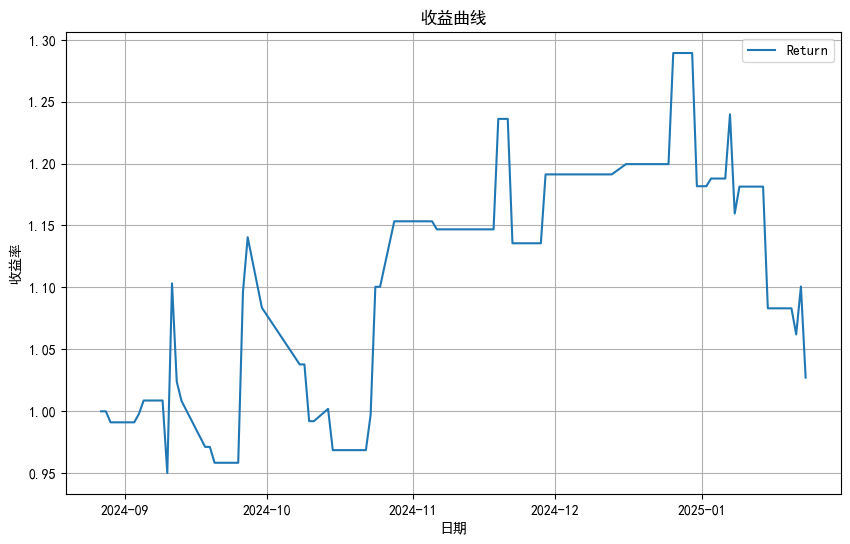

In [17]:
plot(df, 'cumulative_returns')

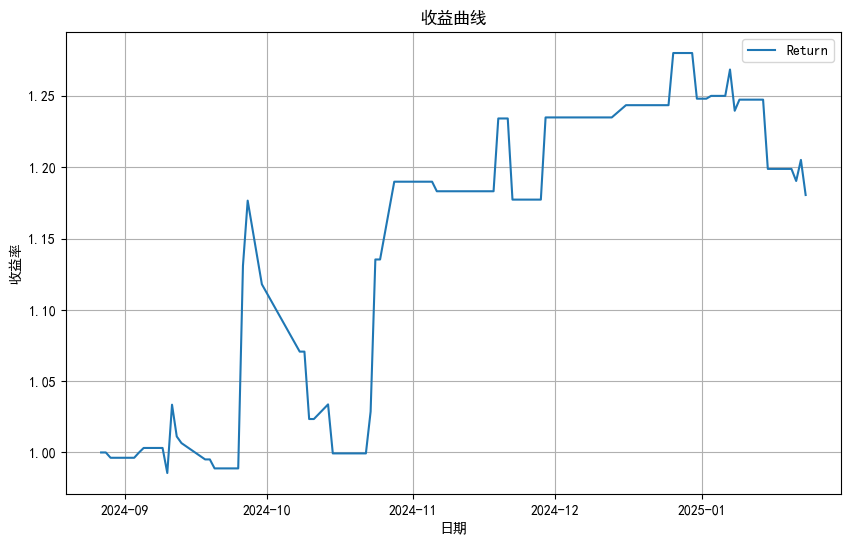

In [18]:
plot(df, 'p_cumulative_returns')

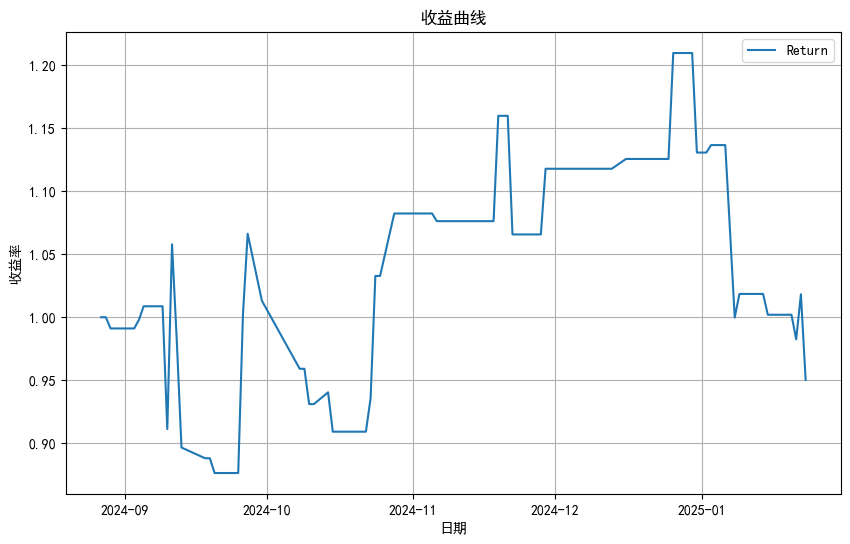

In [19]:
plot(df, 'first_cumulative_returns')

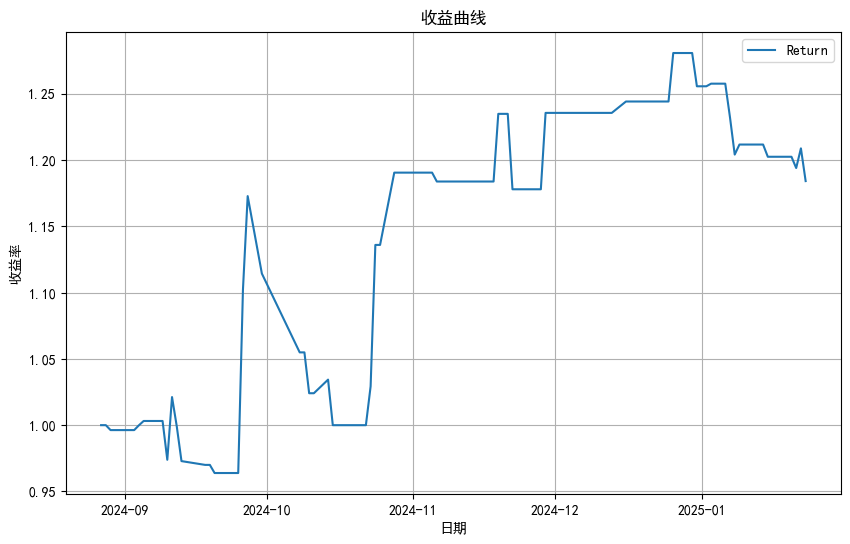

In [20]:
plot(df, 'p_first_cumulative_returns')

In [51]:
len(df_g_zero)

35

In [29]:
df_after_date = df.loc[df.index >= '2024-11-01']
df_after_date['cumulative_returns'] = (1 + df_after_date['return']).cumprod()
df_after_date['p_return'] = df_after_date['return'] * df_after_date['position']
df_after_date['p_cumulative_returns'] = (1 + df_after_date['p_return']).cumprod()
df_after_date['first_cumulative_returns'] = (1 + df_after_date['first_return']).cumprod()
df_after_date['p_first_return'] = df_after_date['first_return'] * df_after_date['position']
df_after_date['p_first_cumulative_returns'] = (1 + df_after_date['p_first_return']).cumprod()
df_after_date_g_zero = df_after_date[df_after_date['codes_num'] > 0]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_42288\3900913857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_date['cumulative_returns'] = (1 + df_after_date['return']).cumprod()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_42288\3900913857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_date['p_return'] = df_after_date['return'] * df_after_date['position']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_42288\3900913857.py:4: SettingWithCopyWarning: 
A value is t

In [39]:
print("return:")
print(caculate_returns(df_after_date_g_zero, 'return'))
print("p return:")
print(caculate_returns(df_after_date_g_zero, 'p_return'))
print("first return:")
print(caculate_returns(df_after_date_g_zero, 'first_return'))
print("p first_return:")
print(caculate_returns(df_after_date_g_zero, 'p_first_return'))

return:
最大回撤: -20.32%
夏普比率: -0.10
总收益率: -10.94%
波动率: 5.58%
最大收益: 7.77%
总盈亏: -10.38%
None
p return:
最大回撤: -7.78%
夏普比率: -0.01
总收益率: -0.78%
波动率: 2.69%
最大收益: 4.90%
总盈亏: -0.22%
None
first return:
最大回撤: -21.46%
夏普比率: -0.14
总收益率: -12.21%
波动率: 5.08%
最大收益: 7.77%
总盈亏: -11.65%
None
p first_return:
最大回撤: -7.55%
夏普比率: -0.00
总收益率: -0.54%
波动率: 2.50%
最大收益: 4.90%
总盈亏: 0.03%
None


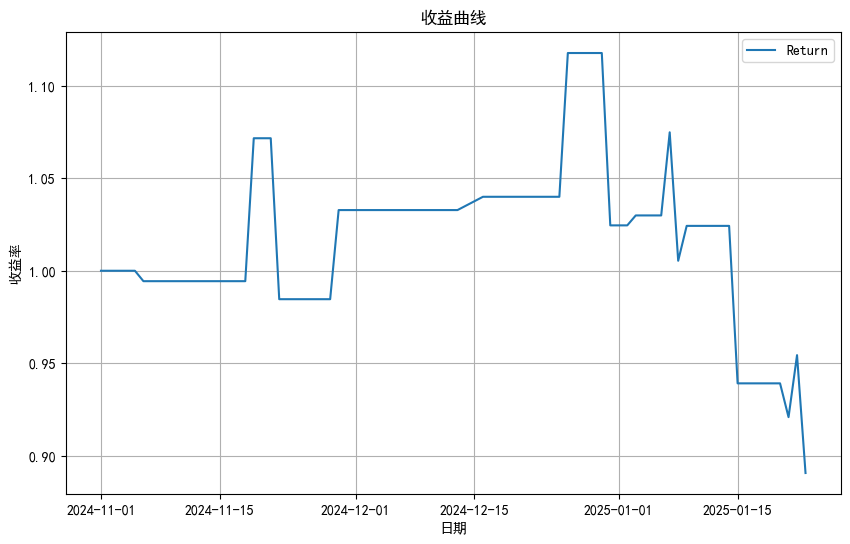

In [35]:
plot(df_after_date, 'cumulative_returns')

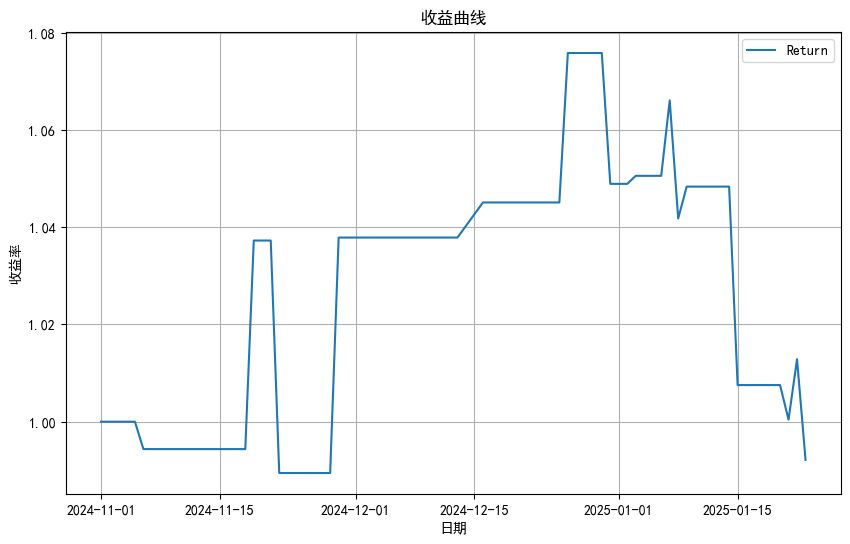

In [36]:
plot(df_after_date, 'p_cumulative_returns')

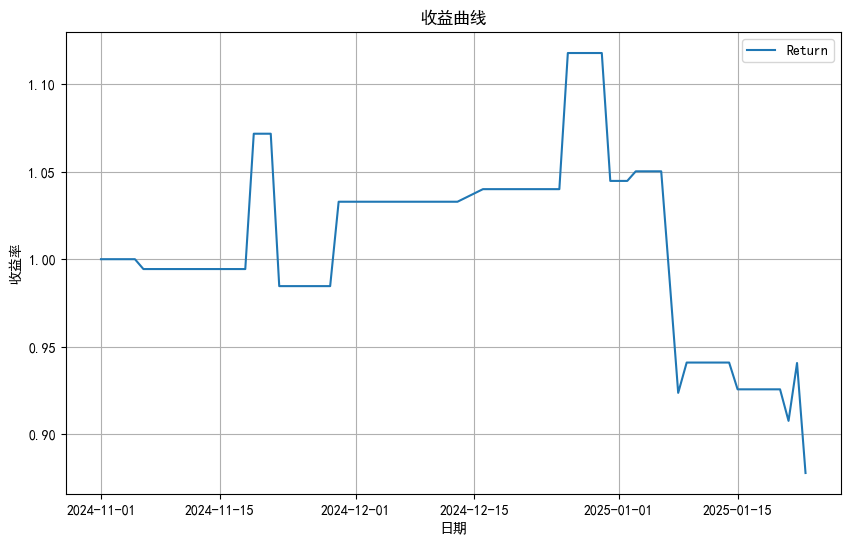

In [37]:
plot(df_after_date, 'first_cumulative_returns')

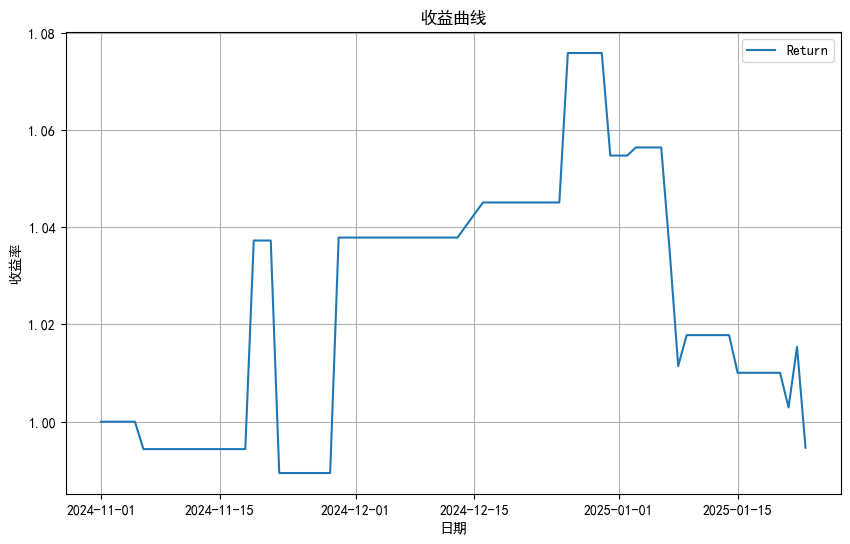

In [38]:
plot(df_after_date, 'p_first_cumulative_returns')

In [45]:
0.008906*0.3

0.0026718

In [47]:
3.61*0.3

1.083

In [52]:
df_g_zero

,code,name,return,max_return,first_return,position,codes_num,cumulative_returns,p_return,p_cumulative_returns,first_cumulative_returns,p_first_return,p_first_cumulative_returns,p3_return,p3_cumulative_returns,p3_first_return,p3_first_cumulative_returns
date,,,,,,,,,,,,,,,,,
2024-08-29,603038,low,-0.008906,0.000000,-0.008906,0.418266,1,0.991094,-0.003725,0.996275,0.991094,-0.003725,0.996275,-0.002672,0.997328,-0.002672,0.997328
2024-09-04,002514,low,0.006881,0.006881,0.006881,0.530514,1,0.997914,0.003650,0.999912,0.997914,0.003650,0.999912,0.002064,0.999387,0.002064,0.999387
2024-09-05,603004,low,0.010820,0.010820,0.010820,0.300000,1,1.008711,0.003246,1.003157,1.008711,0.003246,1.003157,0.003246,1.002631,0.003246,1.002631
2024-09-10,"603306,002104",low,-0.058020,0.000000,-0.096714,0.301968,2,0.950185,-0.017520,0.985582,0.911154,-0.029205,0.973861,-0.017406,0.985179,-0.029014,0.973540
2024-09-11,600550,low,0.161130,0.161130,0.161130,0.301734,1,1.103288,0.048618,1.033499,1.057968,0.048618,1.021208,0.048339,1.032801,0.048339,1.020600
2024-09-12,603883,low,-0.071918,0.000000,-0.071918,0.300000,1,1.023942,-0.021575,1.011201,0.981881,-0.021575,0.999175,-0.021575,1.010518,-0.021575,0.998580
2024-09-13,"600193,000506",low,-0.015152,0.000000,-0.086957,0.302880,2,1.008428,-0.004589,1.006560,0.896500,-0.026337,0.972859,-0.004545,1.005925,-0.026087,0.972530
2024-09-18,"600193,603959",low,-0.036842,0.000000,-0.009524,0.308530,2,0.971275,-0.011367,0.995119,0.887962,-0.002938,0.970001,-0.011053,0.994807,-0.002857,0.969752
2024-09-20,600838,low,-0.013196,0.000000,-0.013196,0.479326,1,0.958458,-0.006325,0.988824,0.876244,-0.006325,0.963865,-0.003959,0.990869,-0.003959,0.965913
